# Понятие производной.

В качестве практики к данному уроку найдите промежутки возрастания и убывания нескольких функций с помощью их производных. Найдите, при каких значениях аргумента достигаются максимум и минимум как значения, при которых возрастание сменяется убыванием и наоборот. Постройте графики этих функций. Соответствуют ли полученные с помощью производных результаты графикам? Неравенства для производных можно решать и вручную, и с помощью sympy, решите сами, как вам удобнее. Вы можете решать вручную и затем проверять себя:

f(x)=x^2+3x-4, 

f(x)=x^3-2x^2+x-6,  

f(x)=e^(2x-x^2).

$f(x)=2x+3$

$f(x)=3x^2-2x+1$

$f(x)=2e^{2x-x^2}(1-x)$


In [1]:
from sympy import *
import matplotlib.pyplot as plt
import numpy as np

def solve_sign(expression, symbol):
    print("p>0: ", solve_univariate_inequality(expression>0,symbol))
    print("p=0: ", [N(sol) for sol in solve(expression)])
    print("p<0: ", solve_univariate_inequality(expression<0,symbol))

def as_vector(expr, symbol):
    @np.vectorize
    def express(value):
        return expr.subs(symbol, value)
    express.__expr = expr
    return express

def plot_expr(*exprs):
    values = np.linspace(-5, 5, num=500)
    fig = plt.figure()
    ax = fig.add_subplot(ylim=(-10, 10))

    ax.spines['left'].set_position(('data', 0.0))
    ax.spines['bottom'].set_position(('data', 0.0))
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    for expr in exprs:
        plt.plot(values, expr(values))
    plt.show()

d x**2 + 3*x - 4 / dx = 2*x + 3
p>0:  (-3/2 < x) & (x < oo)
p=0:  [-1.50000000000000]
p<0:  (-oo < x) & (x < -3/2)


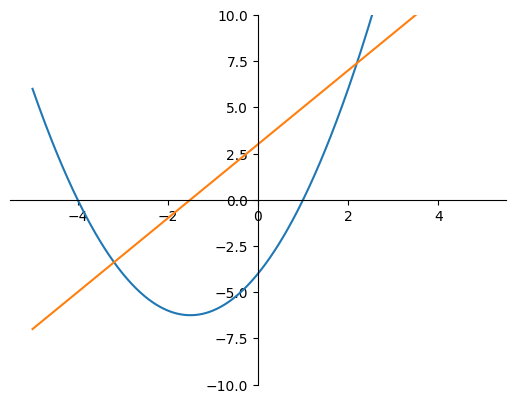

In [2]:
x = Symbol('x')
expr1 = as_vector(x**2+3*x-4, x)
d_expr1 = as_vector(2*x+3, x)
print(f"d {expr1.__expr} / dx = {d_expr1.__expr}")
solve_sign(d_expr1.__expr, x)
plot_expr(expr1, d_expr1)

d x**3 - 2*x**2 + x - 6 / dx = 3*x**2 - 4*x + 1
p>0:  ((-oo < x) & (x < 1/3)) | ((1 < x) & (x < oo))
p=0:  [0.333333333333333, 1.00000000000000]
p<0:  (1/3 < x) & (x < 1)


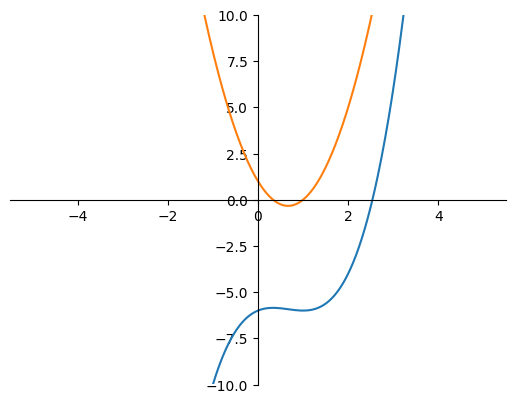

In [3]:
x = Symbol('x')
expr2 = as_vector(x**3-2*x**2+x-6, x)
d_expr2 = as_vector(3*x**2-4*x+1, x)
print(f"d {expr2.__expr} / dx = {d_expr2.__expr}")
solve_sign(d_expr2.__expr, x)
plot_expr(expr2, d_expr2)

d exp(-x**2 + 2*x) / dx = 2*(1 - x)*exp(-x**2 + 2*x)
p>0:  (-oo < x) & (x < 1)
p=0:  [1.00000000000000]
p<0:  (1 < x) & (x < oo)


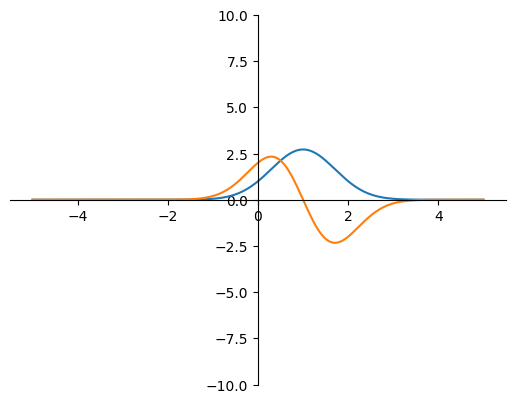

In [4]:
x = Symbol('x')
expr3 = as_vector(exp(2*x-x**2), x)
d_expr3 = as_vector(2*exp(2*x-x**2)*(1-x), x)
print(f"d {expr3.__expr} / dx = {d_expr3.__expr}")
solve_sign(d_expr3.__expr, x)
plot_expr(expr3, d_expr3)